In [277]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [278]:
df = pd.read_csv("EasyVisa.csv")

In [279]:
data= df.copy()

In [280]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [281]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [282]:
data.shape

(25480, 12)

* Data set is having 25480 rows and 12 columns

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* Data is not having any missing values

* no_employess and yr_of_estab are int data types i.e numeric columns

* and prevailing_wage is of float data type.

* Others are of type object i.e, non  numeric



In [286]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000,25480.000,25480.000
mean,5667.043,1979.410,74455.815
std,22877.929,42.367,52815.942
min,-26.000,1800.000,2.137
25%,1022.000,1976.000,34015.480
50%,2109.000,1997.000,70308.210
75%,3504.000,2005.000,107735.513
max,602069.000,2016.000,319210.270


* minimum no of employees column showing negative value which is -26 and we have need to adress it properly .

* Minimum prevailing wage is 2$

* The maximum value of no_of_employees is above 600000, which is quite high but possible.

* The oldest and newest employers have been established since (yr_of_estab =) 1800 and 2016, respectively.

In [288]:
data.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* Most of the employees are from Asia

* Most of the employees's highest education is Bachelor's

* Majority of employees having job expirience

* Majority of employees does not need any training for job

* Northeast region needs more employees

* Yearly wages is most preferred unit of wage

* Majority of employees are with full time position

* Majority of employees are certified for visa


In [290]:
data.duplicated().sum()

0

* No duplicate values observed in the data

In [292]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* No null values observed in the data

In [294]:
# dropping CustomerID as it is not used in data analysation
data.drop(["case_id"], axis=1, inplace=True)

In [295]:
data['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

* 17018 employees are certified for visa

* 8462 employees are denied

In [297]:
# Printing value counts of each column
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.has_job_experience.value_counts())
print(data. requires_job_training.value_counts())
print(data.no_of_employees.value_counts())

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64


In [298]:
# Printing value counts of each column
print(data.yr_of_estab.value_counts())
print(data.region_of_employment.value_counts())
print(data.prevailing_wage.value_counts())
print(data.unit_of_wage .value_counts())
print(data.full_time_position .value_counts())
print(data. case_status.value_counts())

yr_of_estab
1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: count, Length: 199, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
prevailing_wage
82560.280     2
122.650       2
60948.150     2
64357.580     2
108.120       2
             ..
25713.980     1
101656.640    1
65665.550     1
50.881        1
70876.910     1
Name: count, Length: 25454, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


## Treatment of missing value ( No of employee column contains negative value)

In [300]:
data.loc[data['no_of_employees'] < 0].shape

(33, 11)

There are 33 rows with negative values

In [302]:
# Replacing negative value with absolute values
data['no_of_employees'] = abs(data['no_of_employees'])

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [304]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000,25480.000,25480.000
mean,5667.089,1979.410,74455.815
std,22877.917,42.367,52815.942
min,11.000,1800.000,2.137
25%,1022.000,1976.000,34015.480
50%,2109.000,1997.000,70308.210
75%,3504.000,2005.000,107735.513
max,602069.000,2016.000,319210.270


* Negative value is fixed .Minimum no of employees are 11

In [306]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.140,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.390,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.230,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.190,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.760,Year,Y,Certified


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [308]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [309]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
          order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [310]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## EDA

## Univariate Analysis

### continent

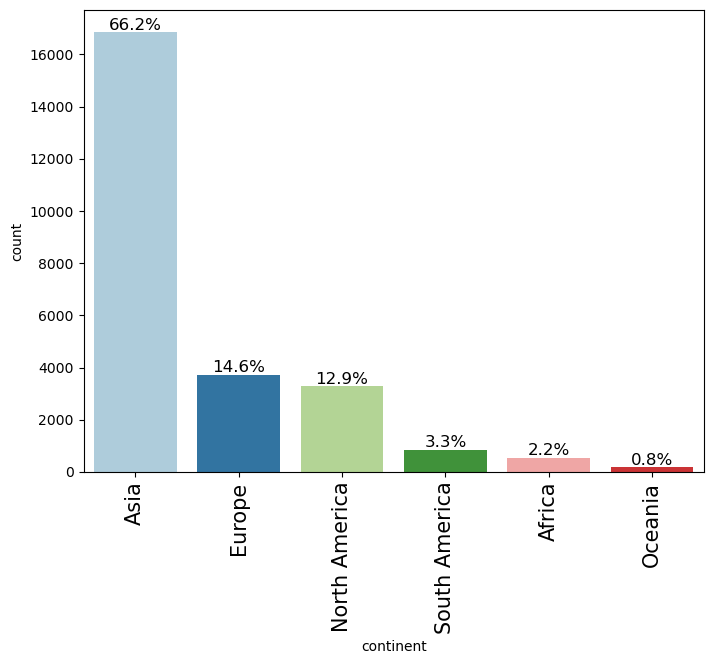

In [314]:
labeled_barplot(data, "continent", perc=True)

* 66% employess belong the Asia continent which is covering maximum employees
* 0.8% employess belongs oceania and which is the least count  of employees

## education_of_employee

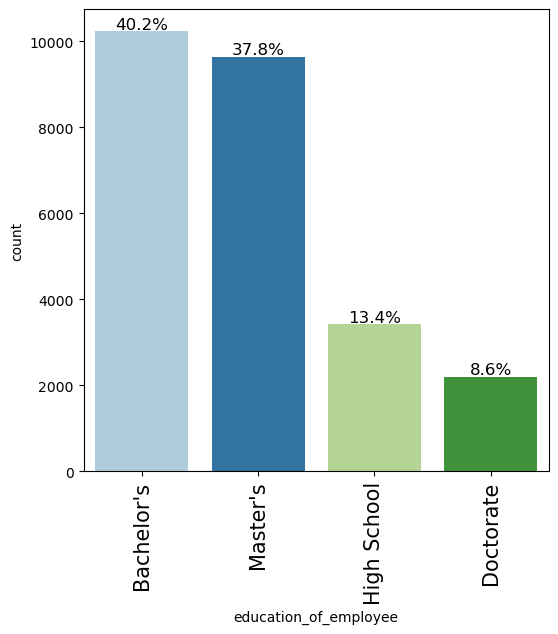

In [317]:

labeled_barplot(data,'education_of_employee',perc=True)

* 40% employees are having bachelor's education background.
* 38% are having master's education background.
* 9% are having doctorate with them.
* 13% employees are having only high school education.


## has_job_experience

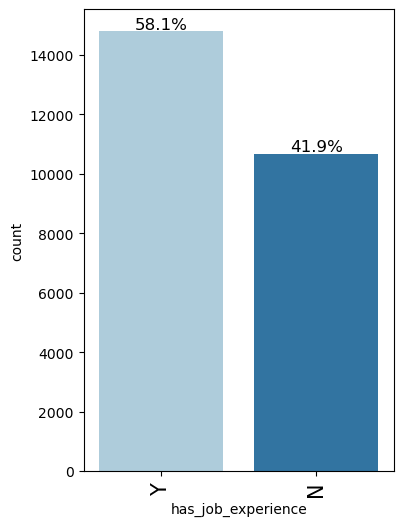

In [320]:
labeled_barplot(data,'has_job_experience',perc=True)

* 58% employees are having prior job experience
* 42% are not having any job experience


## requires_job_training

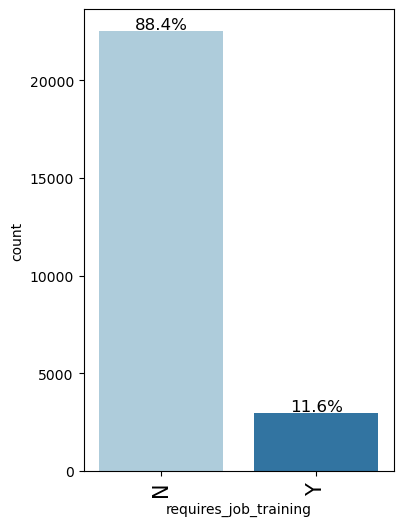

In [323]:
  labeled_barplot(data,'requires_job_training',perc=True)

* Most of the employees i.e 88% employess does not need any job training
* 12 % employees need job training.

## no_of_employees

no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64


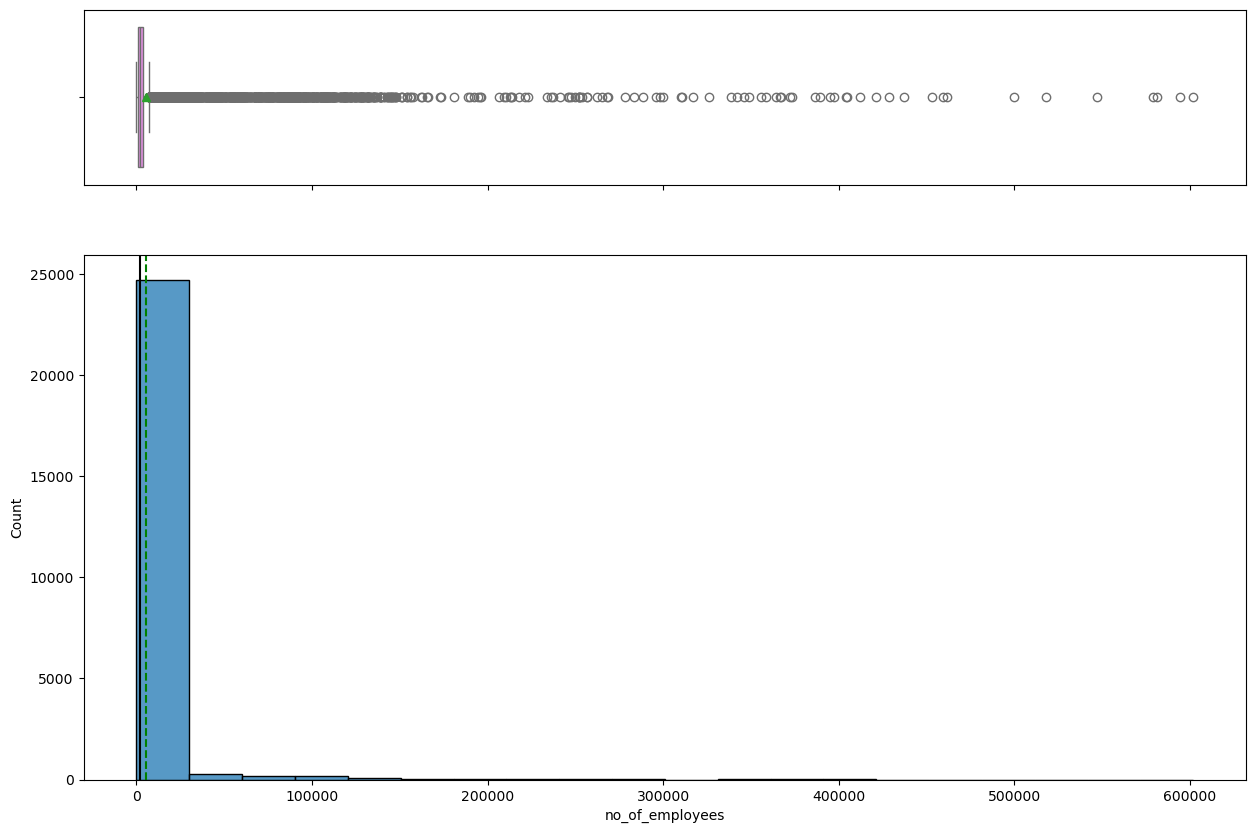

In [326]:
histogram_boxplot(data,'no_of_employees',bins=20)
print(data.no_of_employees.value_counts())

* There are outliers in the data

## yr_of_estab

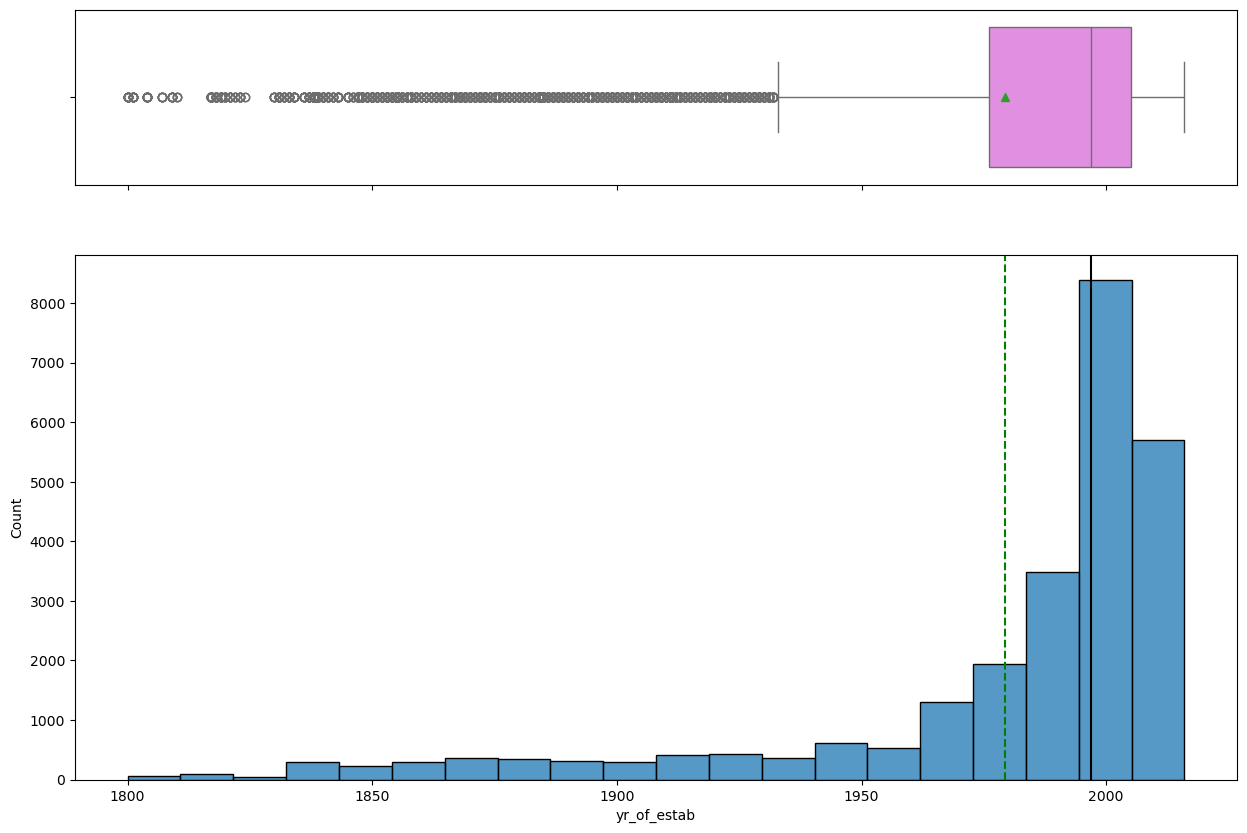

In [329]:
 histogram_boxplot(data,'yr_of_estab',bins=20)


* There are outliers present in the data
* Most of the companies established after 2000
* This data represents the companies which are established in 1800

## region_of_employment

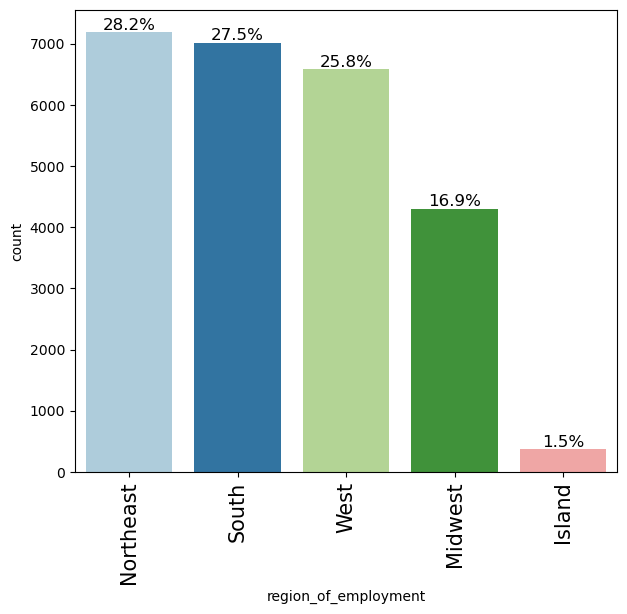

In [332]:
labeled_barplot(data,'region_of_employment',perc=True)

* 28% employees from Northeast are intended to work in US
* 27% employees from south are intended to work in US
* 25% employees from west are intended to work in US
* 17% employees  from midwest are intended to work in US
* only 2% employees from Island are intended to wrok in US


## prevailing_wage

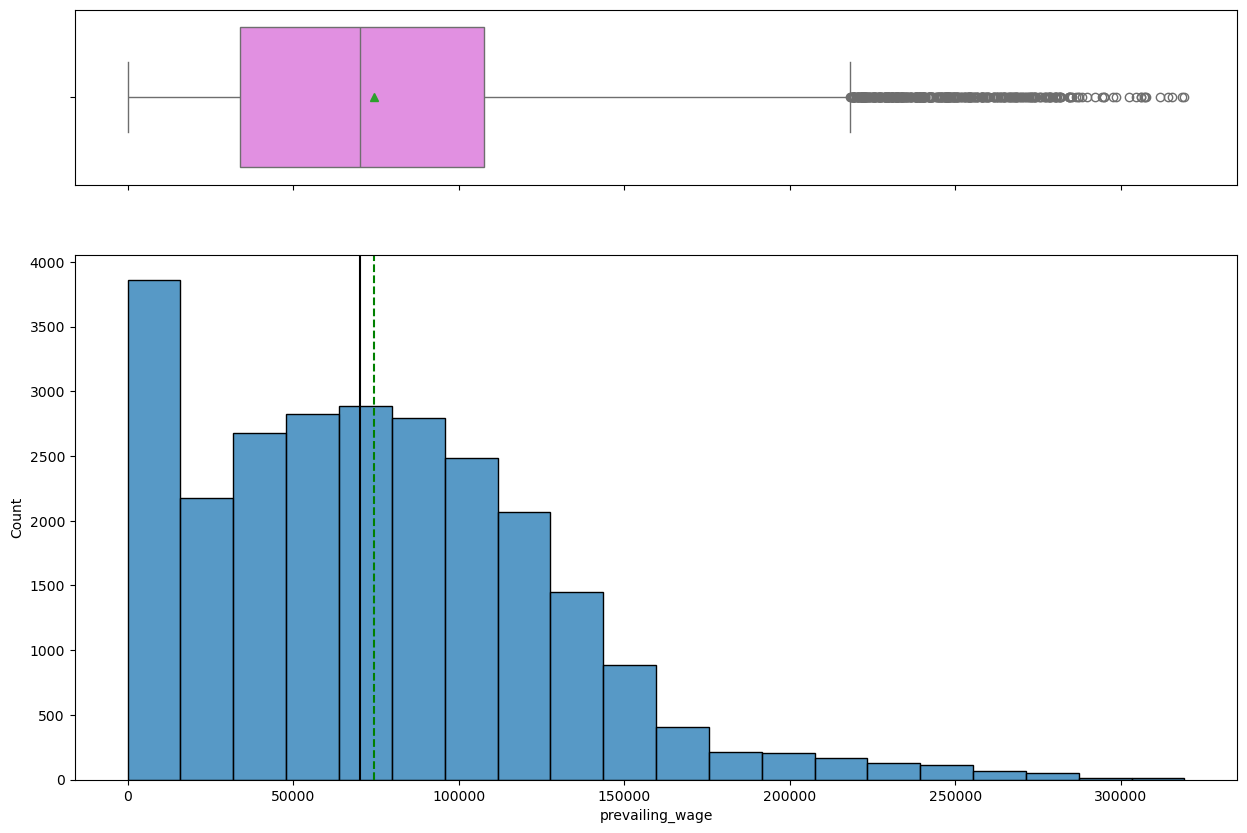

In [335]:
histogram_boxplot(data,'prevailing_wage',bins=20)

## unit_of_wage

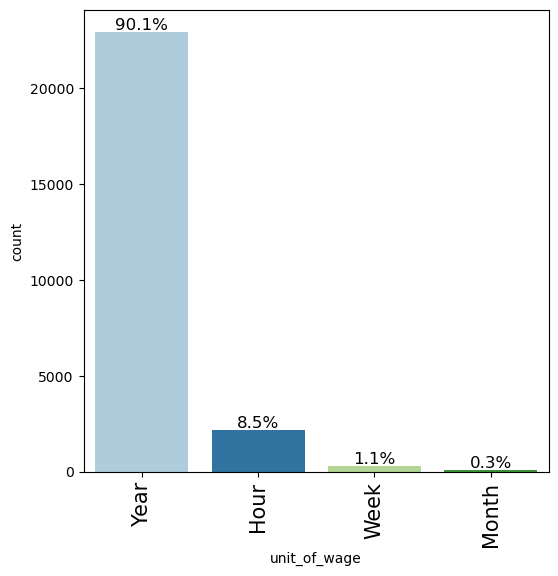

In [337]:
  labeled_barplot(data,'unit_of_wage',perc=True)

* 90% emloyees takes prewailing wage yearly.
* 8.5% employees hourly and 1.1% employees weekly takes the wages
* very less % of employees takes monthly wages


## full_time_position

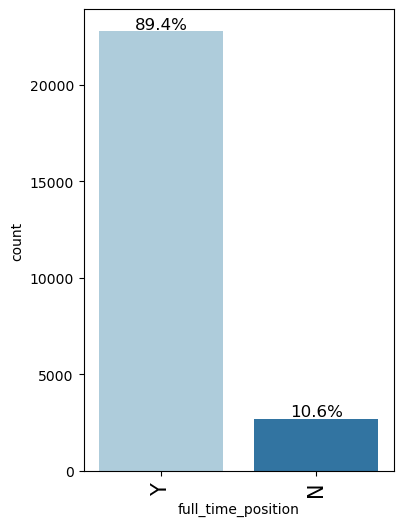

In [340]:
labeled_barplot(data,'full_time_position',perc=True)

* 89% employees are working full time
* 11% employees are working part time

## case_status

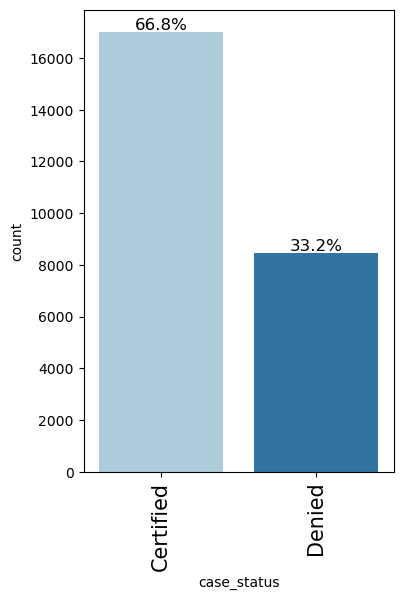

In [343]:
 labeled_barplot(data,'case_status',perc=True)

* 67% employee's visa is certified
* 33% employee's visa is not certified

## Bivariate Analysis

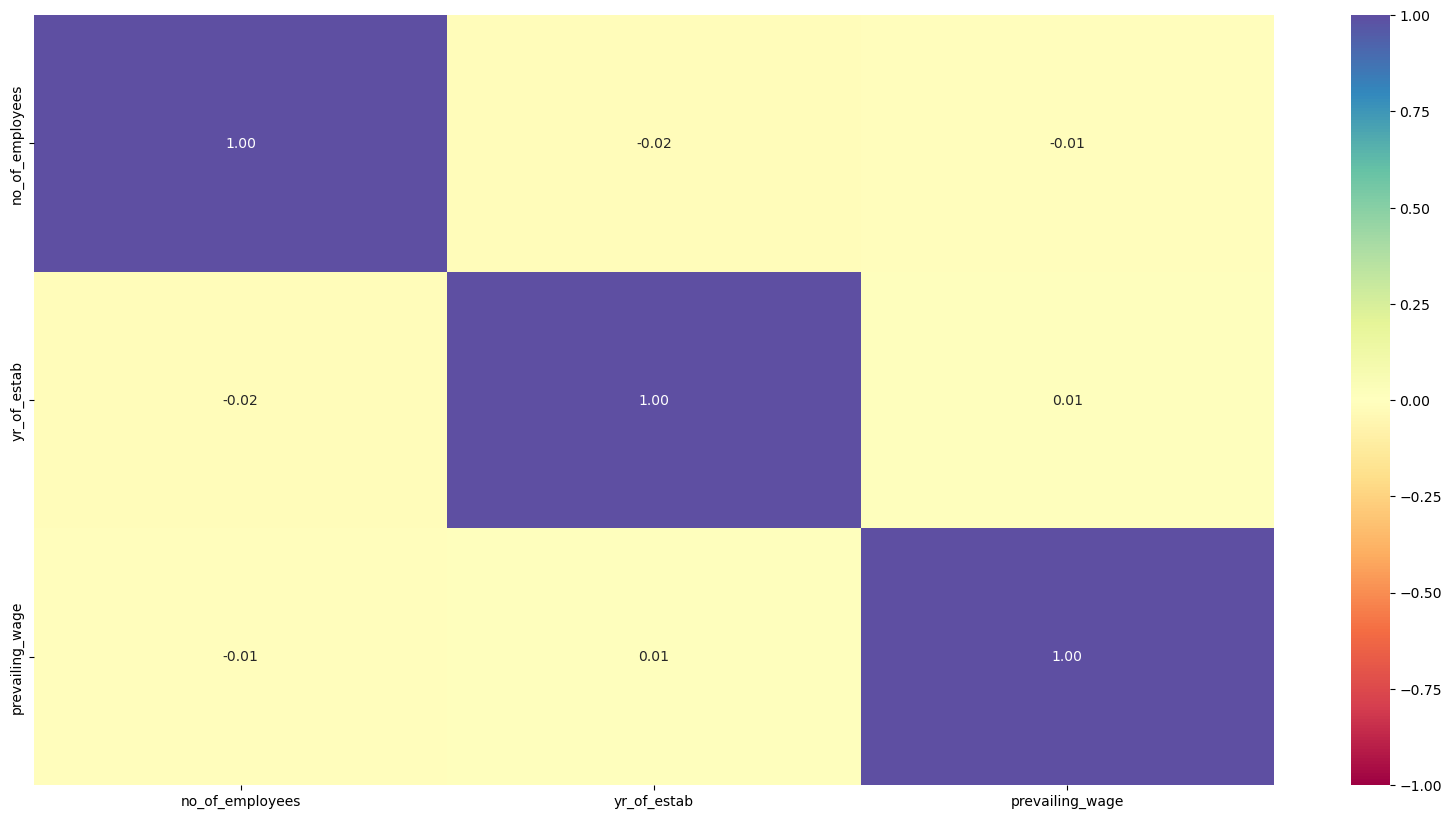

In [346]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

* Year of establishment and no of employees columns are negatively co-related
* no of employees and prevailing wage columns are negatively co-related
* prevailing wage and year of establish columns are positevely co related

## Continent Vs Case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


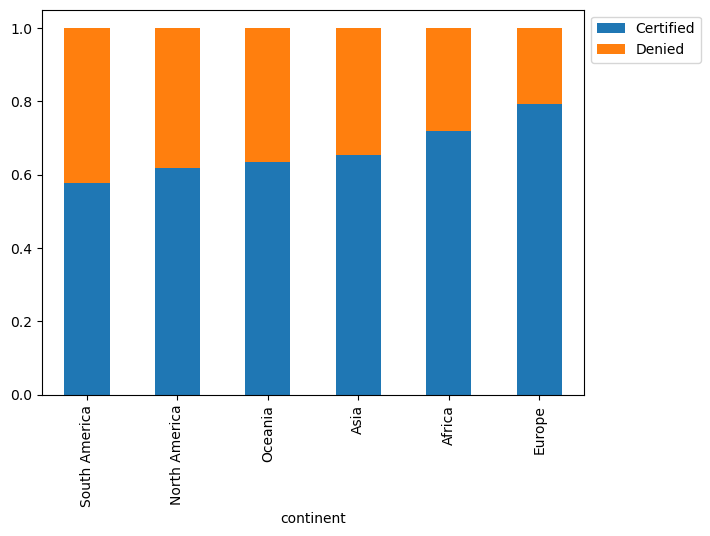

In [349]:
stacked_barplot(data, "continent", "case_status")

* Maximum employees who are certified for visa are from Europe
* second highest employees who are certified for visa are from Africa


## education_of_employee vs case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


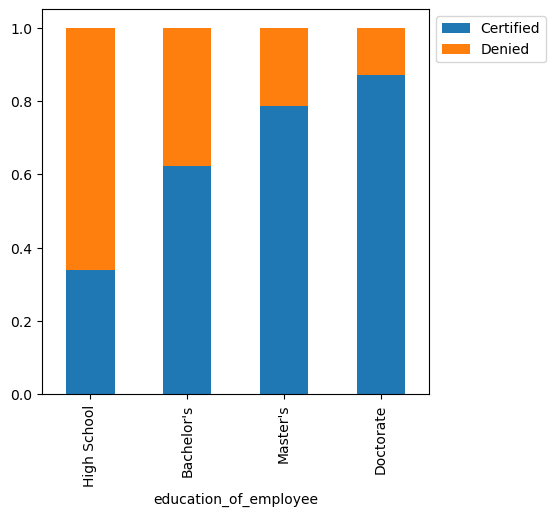

In [352]:
stacked_barplot(data, "education_of_employee", "case_status")

* People are who are holding doctorate degree are considered first for visa certification
* Next preferred people are the people who holds masters degree
* Next preferred are the people who holds degree
* High school qualified people are least preferred for the visa certification

## has_job_experience Vs case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


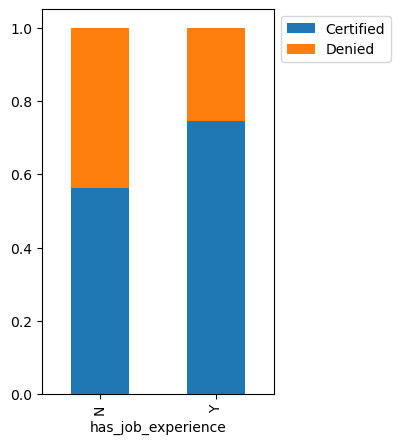

In [355]:
stacked_barplot(data, "has_job_experience", "case_status")

* People who have job expirience are preferred more for visa certification


## requires_job_training Vs case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


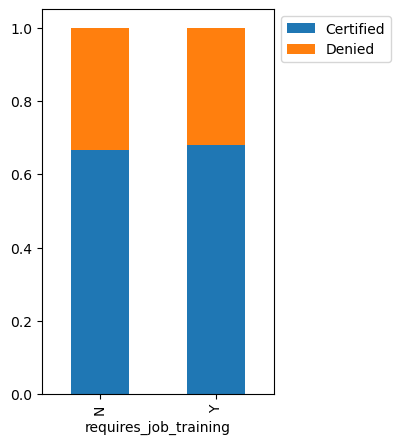

In [358]:
stacked_barplot(data, "requires_job_training", "case_status")

* People who do not require any training are more preferred for visa certification

## region_of_employment Vs case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


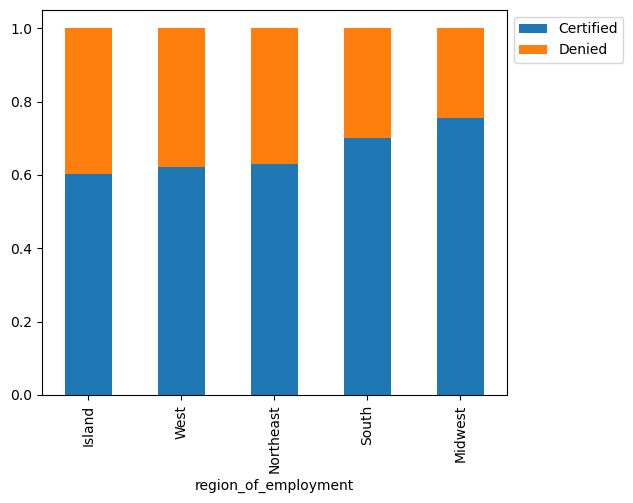

In [361]:
stacked_barplot(data, "region_of_employment", "case_status")

* Midwest people are more considered for visa certification


## Unit of wage Vs Case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


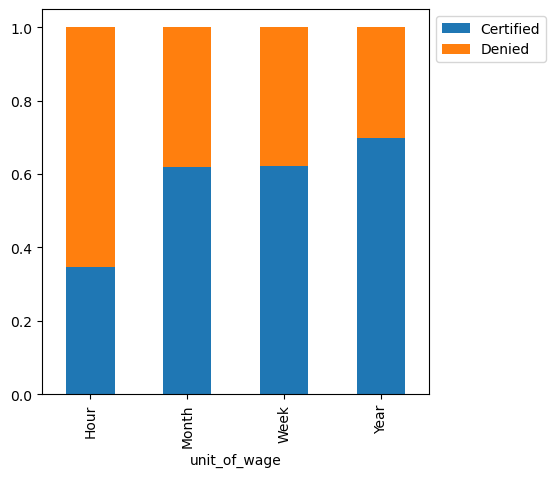

In [364]:
stacked_barplot(data, "unit_of_wage", "case_status")

* employees who takes wages yearly are preferred more for visa certification

## full_time_position Vs Case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


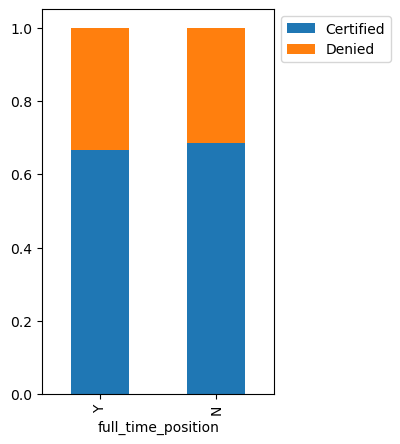

In [367]:
stacked_barplot(data, "full_time_position", "case_status")

* People who are in full time position are preferred more for visa certification

## region_of_employment Vs prevailing wage

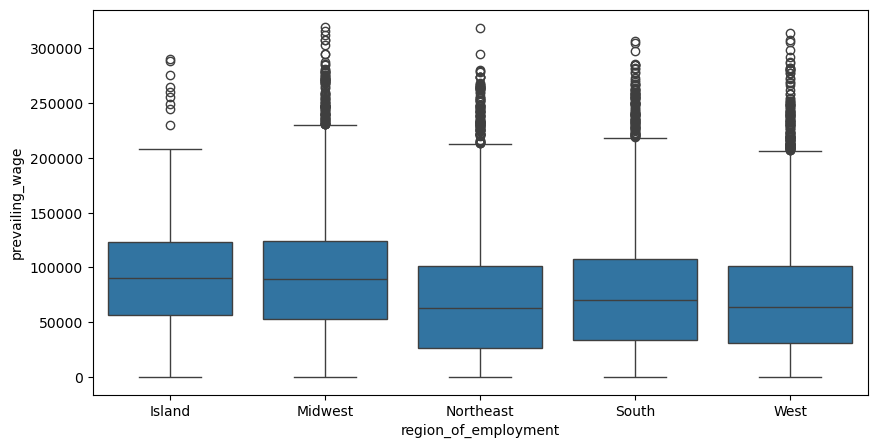

In [370]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

* prevailing wages is higher in Midwest and Island

In [372]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
         color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## prevailing_wage Vs case_status

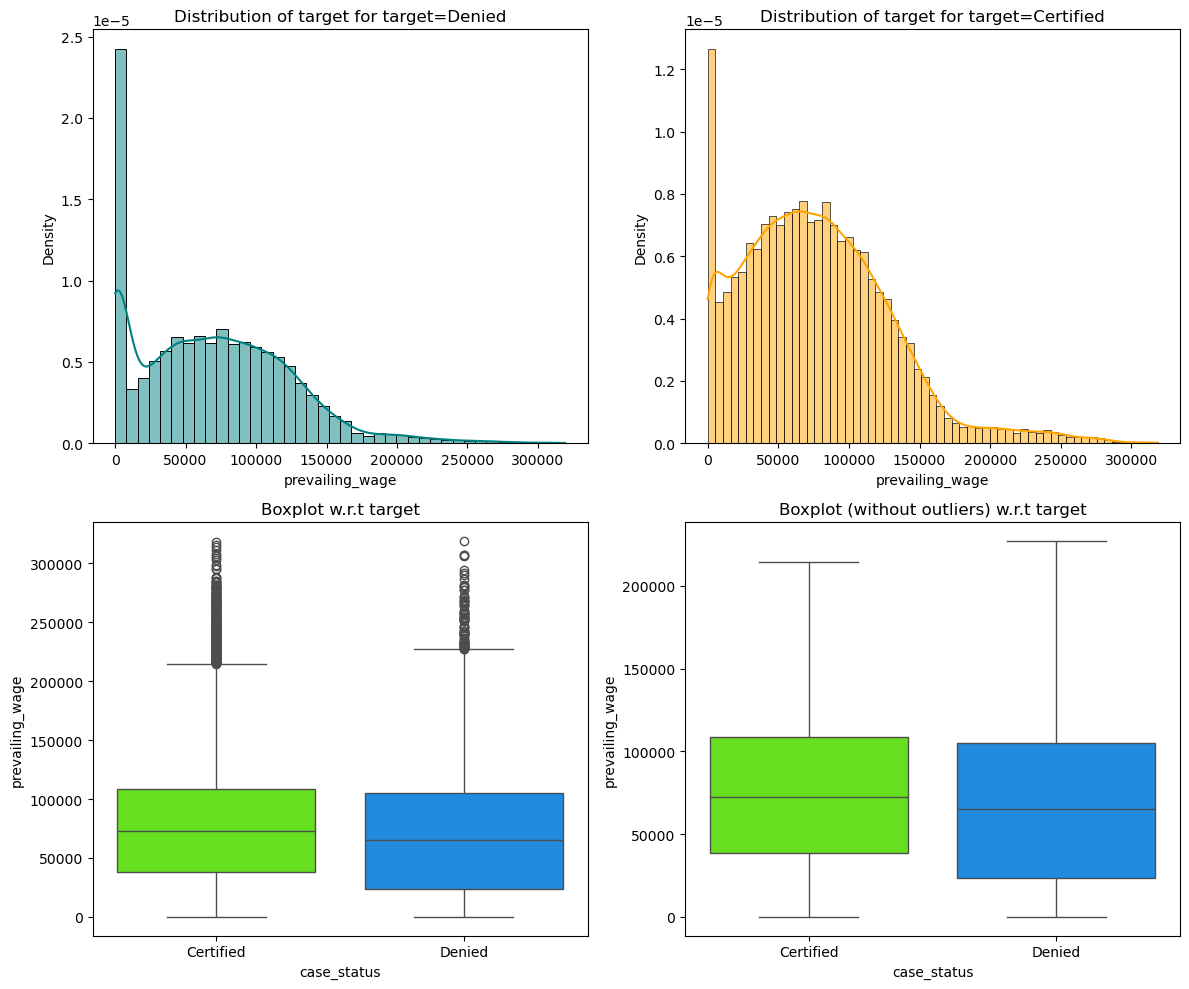

In [374]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* The median prevailing wage for the certified applications is slightly higher as compared to denied applications.

## Data-Pre processing

## Outlier detection

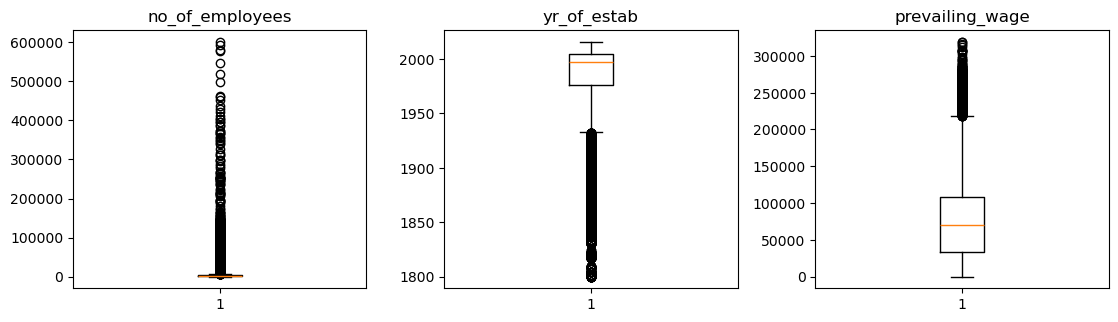

In [378]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are outleirs in the data but as they are proper value we are not going to address

In [380]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them


continent_mapping = {"Asia": 0, "Europe": 1, "North America": 2, "South America": 3, "Africa": 4, "Oceania": 5} # Corrected: Renamed 'continent' to 'continent_mapping'
data["continent"] = data["continent"].map(continent_mapping)

education_of_employee_mapping = {"Bachelor's": 0, "Master's": 1, "High School": 2, "Doctorate": 3}
# Map values in the 'education_of_employee' column using the mapping dictionary
data["education_of_employee"] = data["education_of_employee"].map(education_of_employee_mapping)

has_job_experience = {"Y": 1, "N": 0}
data["has_job_experience"] = data["has_job_experience"].map(has_job_experience)

requires_job_training = {"Y": 1, "N": 0}
data["requires_job_training"] = data["requires_job_training"].map(requires_job_training)


region_of_employment_mapping = {"Northeast": 0, "South": 1, "West": 2, "Midwest": 3, "Island": 4}
# Map values in the 'region_of_employment' column using the mapping dictionary
data["region_of_employment"] = data["region_of_employment"].map(region_of_employment_mapping)


unit_of_wage_mapping = {"Year": 0, "Hour": 1, "Week": 2, "Month": 3}
# Map values in the 'unit_of_wage' column using the mapping dictionary
data["unit_of_wage"] = data["unit_of_wage"].map(unit_of_wage_mapping)

full_time_position_mapping = {"Y": 1, "N": 0}
# Map values in the 'full_time_position' column using the mapping dictionary
data["full_time_position"] = data["full_time_position"].map(full_time_position_mapping)

case_status_mapping = {"Certified": 1, "Denied": 0}
# Map values in the 'case_status' column using the mapping dictionary
data["case_status"] = data["case_status"].map(case_status_mapping)

In [381]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,2,0,0,14513,2007,2,592.203,1,1,0
1,0,1,1,0,2412,2002,0,83425.650,0,1,1
2,0,0,0,1,44444,2008,2,122996.860,0,1,0
3,0,0,0,0,98,1897,2,83434.030,0,1,0
4,4,1,1,0,1082,2005,1,149907.390,0,1,1


In [382]:
data["continent"]=data["continent"].astype(int)
data["education_of_employee"]=data["education_of_employee"].astype(int)
data["has_job_experience"]=data["has_job_experience"].astype(int)
data["requires_job_training"]=data["requires_job_training"].astype(int)
data["region_of_employment"]=data["region_of_employment"].astype(int)
data["unit_of_wage"]=data["unit_of_wage"].astype(int)
data["full_time_position"]=data["full_time_position"].astype(int)

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  int32   
 1   education_of_employee  25480 non-null  int32   
 2   has_job_experience     25480 non-null  int32   
 3   requires_job_training  25480 non-null  int32   
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  int32   
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  int32   
 9   full_time_position     25480 non-null  int32   
 10  case_status            25480 non-null  category
dtypes: category(1), float64(1), int32(7), int64(2)
memory usage: 1.3 MB


In [384]:
# Printing value counts of each column
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.has_job_experience.value_counts())
print(data. requires_job_training.value_counts())
print(data.no_of_employees.value_counts())


continent
0    16861
1     3732
2     3292
3      852
4      551
5      192
Name: count, dtype: int64
education_of_employee
0    10234
1     9634
2     3420
3     2192
Name: count, dtype: int64
has_job_experience
1    14802
0    10678
Name: count, dtype: int64
requires_job_training
0    22525
1     2955
Name: count, dtype: int64
no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: count, Length: 7105, dtype: int64


In [385]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"].apply(lambda x: 1 if x == "yes" else 0)

In [386]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, data['case_status'], test_size=0.2, random_state=1, stratify=data['case_status']
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [387]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


## Reverse Mapping

In [389]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [390]:
continent_mapping = {"Asia": 0, "Europe": 1, "North America": 2, "South America": 3, "Africa": 4, "Oceania": 5} # Corrected: Renamed 'continent' to 'continent_mapping'
education_of_employee_mapping = {"Bachelor's": 0, "Master's": 1, "High School": 2, "Doctorate": 3}
has_job_experience = {"Y": 1, "N": 0}
requires_job_training = {"Y": 1, "N": 0}
region_of_employment_mapping = {"Northeast": 0, "South": 1, "West": 2, "Midwest": 3, "Island": 4}
unit_of_wage_mapping = {"Year": 0, "Hour": 1, "Week": 2, "Month": 3}
full_time_position_mapping = {"Y": 1, "N": 0}
case_status_mapping = {"Certified": 1, "Denied": 0}

## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

inverse_mapping(continent_mapping, "continent") # Corrected: Changed 'continent' to 'continent_mapping'
inverse_mapping(education_of_employee_mapping, "education_of_employee")
inverse_mapping(has_job_experience, "has_job_experience")
inverse_mapping(requires_job_training, "requires_job_training")
inverse_mapping(region_of_employment_mapping, "region_of_employment")
inverse_mapping(unit_of_wage_mapping, "unit_of_wage")
inverse_mapping(full_time_position_mapping, "full_time_position")

## Train set

In [392]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


## Validation set

In [394]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


## Test set

In [396]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


## Creating dummy variables

In [398]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [399]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [400]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

**Model can make wrong predictions as:**
1. Predicting the visa is certified but in reality visa is denied - False positive - Opportunity loss
2. Predicting the visa is denied but in reality visa is certified - False Negative- Resource loss

**Which case is more important?**
Both the cases are important as:

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

**How to reduce this loss 


F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

We will use balanced class weights so that model focuses equally on both classes.

## Initial Model Building - Original data

In [404]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))


print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

dtree: 1.0
Bagging: 0.9896098804156048
Random forest: 1.0
GBM: 0.8291218182658106
Adaboost: 0.81941431670282

Validation Performance:

dtree: 0.7486033519553073
Bagging: 0.7775995333236109
Random forest: 0.8049978941457251
GBM: 0.826637008202419
Adaboost: 0.8166485310119695


## Training and validation performance difference

In [406]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

dtree: Training Score: 1.0000, Validation Score: 0.7486, Difference: 0.2514
Bagging: Training Score: 0.9896, Validation Score: 0.7776, Difference: 0.2120
Random forest: Training Score: 1.0000, Validation Score: 0.8050, Difference: 0.1950
GBM: Training Score: 0.8291, Validation Score: 0.8266, Difference: 0.0025
Adaboost: Training Score: 0.8194, Validation Score: 0.8166, Difference: 0.0028


*GBM has the best performance followed by AdaBoost model as per the validation performance

### Model Building - Oversampled Data

In [409]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'denied': 5078 

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'denied': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



## Training and validation performance after over sampling

In [411]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9875473741201949
Random forest: 0.9999510260051913
GBM: 0.8072434234901815
Adaboost: 0.7980933870146698
dtree: 1.0

Validation Performance:

Bagging: 0.7665171898355755
Random forest: 0.7965442764578834
GBM: 0.8173049645390071
Adaboost: 0.8117746957260119
dtree: 0.7320006012325266


## Training and Validation Performance Difference

In [413]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9875, Validation Score: 0.7665, Difference: 0.2210
Random forest: Training Score: 1.0000, Validation Score: 0.7965, Difference: 0.2034
GBM: Training Score: 0.8072, Validation Score: 0.8173, Difference: -0.0101
Adaboost: Training Score: 0.7981, Validation Score: 0.8118, Difference: -0.0137
dtree: Training Score: 1.0000, Validation Score: 0.7320, Difference: 0.2680


### Model Building - Undersampled Data

In [415]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [416]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Certified': 10210
Before Under Sampling, counts of label 'denied': 5078 

After Under Sampling, counts of label 'Certified': 5078
After Under Sampling, counts of label 'denied': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



## Training and validation performance after under sampling

In [418]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random forest: 1.0
GBM: 0.7281441717791411
Adaboost: 0.7051306873184898
dtree: 1.0

Validation Performance:

Bagging: 0.7057046979865772
Random forest: 0.7417218543046358
GBM: 0.776595744680851
Adaboost: 0.7619499841722064
dtree: 0.6955818093542644


## Training and Validation Performance Difference

In [420]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9804, Validation Score: 0.7057, Difference: 0.2747
Random forest: Training Score: 1.0000, Validation Score: 0.7417, Difference: 0.2583
GBM: Training Score: 0.7281, Validation Score: 0.7766, Difference: -0.0485
Adaboost: Training Score: 0.7051, Validation Score: 0.7619, Difference: -0.0568
dtree: Training Score: 1.0000, Validation Score: 0.6956, Difference: 0.3044


## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [423]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9312726426438074:
CPU times: total: 1.17 s
Wall time: 12.9 s


In [424]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

## Performance on Training set

In [426]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.598,0.931,0.559,0.698


## Performance on validation set

In [428]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.716,0.934,0.722,0.815


### Tuning  Gradient Boosting model with Undersampled Data

In [430]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7843663938559404:
CPU times: total: 2.23 s
Wall time: 36.6 s


In [431]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=150,
                           random_state=1, subsample=0.9)

## Performance on training set

In [433]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.705,0.757,0.686,0.720


## Performance on validation set

In [435]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.718,0.744,0.818,0.779


### Tuning Gradient Boosting model with Oversampled data

In [437]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8920666013712047:
CPU times: total: 5.19 s
Wall time: 52.7 s


In [438]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=1)

## Performance on training set

In [440]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.697,0.754,0.677,0.713


## Performance on validation set

In [442]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.718,0.744,0.818,0.779


## Model Comparison and Final Model Selection

In [444]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.705,0.697,0.598
Recall,0.757,0.754,0.931
Precision,0.686,0.677,0.559
F1,0.720,0.713,0.698


In [445]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.718,0.718,0.716
Recall,0.744,0.744,0.934
Precision,0.818,0.818,0.722
F1,0.779,0.779,0.815


## Performance on Test set(Tuned adaboost)

In [447]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.708,0.930,0.717,0.810


## Performance on Test set(Tuned GBM undersample data)

In [541]:
# Let's check the performance on test set
gbm_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.713,0.754,0.804,0.778


## Performance on Test set(Tuned GBM Oversample data)

In [543]:
# Let's check the performance on test set
gbm_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.720,0.888,0.743,0.809


* Training and test performance of adaboost data with undersampled data is comparable i.e. 81%
  
* we can conclude that adaboost with undersampled data model is more generalised and we can go with this model to predict the visa approval process
  

## Business insights Recommendations 

* Maximum employees who are certified for visa are from Europe

* second highest employees who are certified for visa are from Africa

* People from Oceania are least preferred for visa

* People are who are holding doctorate degree are considered first for visa certification

  
* Next preferred people are the people who holds master’s degree

* Next preferred are the people who holds degree


* High school qualified people are least preferred for the visa certification
* Most of the employees are having prior job experience and preferred more for visa approval
* Most of the employees does not need any job training and these people are more preferred for visa as they are cost effective
*	Midwest people are more considered for visa certification
* 28% employees from Northeast are intended to work in US
* 	27% employees from south are intended to work in US
* 25% employees from west are intended to work in US
*	17% employees from Midwest are intended to work in US
* only 2% employees from Island are intended to work in US
* 90% employees take prevailing wage yearly.
* 8.5% employees hourly and 1.1% employees weekly takes the wages
* very less % of employees take monthly wages
* employees who take wages yearly are preferred more for visa certification
* Full time working employees are preferred more for visa approval
* 67% employee's visa is certified
* 33% employee's visa is not certified
*	prevailing wages is higher in Midwest and Island
*	The median prevailing wage for the certified applications is slightly higher as compared to denied applications.
*	Training and test performance of ada boost data with under sampled data is comparable i.e. 81%
*	we can conclude that ada boost with under sampled data model is more generalised and we can go with this model to predict the visa approval process


